In [ ]:
import tensorflow_decision_forests as tfdf
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math


Datasets

In [9]:
# Load a dataset into a Pandas Dataframe.
df = pd.read_csv("penguins.csv")

# Display the first 3 examples.
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007


Encode using label

In [10]:
# Encode the categorical labels as integers.
#
# Details:
# This stage is necessary if your classification label is represented as a
# string since Keras expects integer classification labels.
# When using `pd_dataframe_to_tf_dataset` (see below), this step can be skipped.

# Name of the label column.
label = "species"

classes = df[label].unique().tolist()
print(f"Label classes: {classes}")

df[label] = df[label].map(classes.index)
df.head(3)

Label classes: ['Adelie', 'Gentoo', 'Chinstrap']


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,0,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,0,Torgersen,40.3,18.0,195.0,3250.0,female,2007


Train test split

In [11]:
# Split the dataset into a training and a testing dataset.

def split_dataset(dataset, test_ratio=0.30):
  """Splits a panda dataframe in two."""
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]


train_ds_pd, test_ds_pd = split_dataset(df)
print("{} examples in training, {} examples for testing.".format(
    len(train_ds_pd), len(test_ds_pd)))

243 examples in training, 101 examples for testing.


In [12]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test_ds_pd, label=label)

In [15]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel(verbose=2)

# Train the model.
model_1.fit(train_ds)

Use 12 thread(s) for training
Use /tmp/tmpsw83yvuf as temporary training directory
Reading training dataset...


2023-05-28 19:49:19.887366: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_7' with dtype int64 and shape [243]
	 [[{{node Placeholder/_7}}]]


Training tensor examples:
Features: {'island': <tf.Tensor 'data:0' shape=(None,) dtype=string>, 'bill_length_mm': <tf.Tensor 'data_1:0' shape=(None,) dtype=float64>, 'bill_depth_mm': <tf.Tensor 'data_2:0' shape=(None,) dtype=float64>, 'flipper_length_mm': <tf.Tensor 'data_3:0' shape=(None,) dtype=float64>, 'body_mass_g': <tf.Tensor 'data_4:0' shape=(None,) dtype=float64>, 'sex': <tf.Tensor 'data_5:0' shape=(None,) dtype=string>, 'year': <tf.Tensor 'data_6:0' shape=(None,) dtype=int64>}
Label: Tensor("data_7:0", shape=(None,), dtype=int64)
Weights: None
Normalized tensor features:
 {'island': SemanticTensor(semantic=<Semantic.CATEGORICAL: 2>, tensor=<tf.Tensor 'data:0' shape=(None,) dtype=string>), 'bill_length_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast:0' shape=(None,) dtype=float32>), 'bill_depth_mm': SemanticTensor(semantic=<Semantic.NUMERICAL: 1>, tensor=<tf.Tensor 'Cast_1:0' shape=(None,) dtype=float32>), 'flipper_length_mm': SemanticTensor(semant

[INFO 23-05-28 19:49:26.4727 UTC kernel.cc:773] Start Yggdrasil model training
[INFO 23-05-28 19:49:26.4728 UTC kernel.cc:774] Collect training examples
[INFO 23-05-28 19:49:26.4728 UTC kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

[INFO 23-05-28 19:49:26.4735 UTC kernel.cc:393] Number of batches: 1
[INFO 23-05-28 19:49:26.4735 UTC kernel.cc:394] Number of examples: 243
[INFO 23-05-28 19:49:26.4737 UTC kernel.cc:794] Training dataset:
Number of records: 243
Number of columns: 8

Number of columns by type:
	NUMERICAL: 5 (62.5%)
	CATEGORICAL: 3 (37.5%)

Columns:

NUMERICAL: 5 (62.5%)
	1: "bill_depth_mm" NUMERICAL num-nas:2 (0.823045%) mean:17.2021 min:1

Model trained in 0:00:00.148459
Compiling model...


2023-05-28 19:49:26.632953: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype string and shape [243]
	 [[{{node Placeholder/_5}}]]


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model compiled.


Evaluasi model

In [16]:
model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_ds, return_dict=True)
print()

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2023-05-28 19:50:28.280171: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype double and shape [101]
	 [[{{node Placeholder/_3}}]]


1/1 [==============================] - 1s 673ms/step - loss: 0.0000e+00 - accuracy: 0.9604

loss: 0.0000
accuracy: 0.9604


Save model

In [18]:
model_1.save("my_saved_model")

INFO:tensorflow:Assets written to: my_saved_model/assets


INFO:tensorflow:Assets written to: my_saved_model/assets


In [19]:
tfdf.model_plotter.plot_model_in_colab(model_1, tree_idx=0, max_depth=3)

In [20]:
model_1.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (7):
	bill_depth_mm
	bill_length_mm
	body_mass_g
	flipper_length_mm
	island
	sex
	year

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.    "bill_length_mm"  0.456554 ################
    2. "flipper_length_mm"  0.428769 #############
    3.            "island"  0.310689 #####
    4.     "bill_depth_mm"  0.306260 ####
    5.       "body_mass_g"  0.278542 ##
    6.              "year"  0.240729 
    7.               "sex"  0.240665 

Variable Importance: NUM_AS_ROOT:
    1. "flipper_length_mm" 141.000000 ################
    2.    "bill_length_mm" 97.000000 ##########
    3.     "bill_depth_mm" 37.000000 ###
    4.     

Cek input features

In [21]:
# The input features
model_1.make_inspector().features()

["bill_depth_mm" (1; #1),
 "bill_length_mm" (1; #2),
 "body_mass_g" (1; #3),
 "flipper_length_mm" (1; #4),
 "island" (4; #5),
 "sex" (4; #6),
 "year" (1; #7)]

In [22]:
# The feature importances
model_1.make_inspector().variable_importances()

{'INV_MEAN_MIN_DEPTH': [("bill_length_mm" (1; #2), 0.45655413448499105),
  ("flipper_length_mm" (1; #4), 0.4287693153025051),
  ("island" (4; #5), 0.3106894402091482),
  ("bill_depth_mm" (1; #1), 0.30625952103422277),
  ("body_mass_g" (1; #3), 0.2785423986655936),
  ("year" (1; #7), 0.2407285602178195),
  ("sex" (4; #6), 0.24066515264091845)],
 'SUM_SCORE': [("bill_length_mm" (1; #2), 26174.488343275152),
  ("flipper_length_mm" (1; #4), 23368.24777495768),
  ("island" (4; #5), 10627.320282647386),
  ("bill_depth_mm" (1; #1), 8507.212666989304),
  ("body_mass_g" (1; #3), 3451.545399470255),
  ("sex" (4; #6), 150.64173122867942),
  ("year" (1; #7), 39.69896325469017)],
 'NUM_AS_ROOT': [("flipper_length_mm" (1; #4), 141.0),
  ("bill_length_mm" (1; #2), 97.0),
  ("bill_depth_mm" (1; #1), 37.0),
  ("island" (4; #5), 17.0),
  ("body_mass_g" (1; #3), 8.0)],
 'NUM_NODES': [("bill_length_mm" (1; #2), 609.0),
  ("bill_depth_mm" (1; #1), 394.0),
  ("flipper_length_mm" (1; #4), 386.0),
  ("body_ma

In [23]:
model_1.make_inspector().training_logs()

[TrainLog(num_trees=1, evaluation=Evaluation(num_examples=87, accuracy=0.896551724137931, loss=3.728653611807988, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=11, evaluation=Evaluation(num_examples=241, accuracy=0.9585062240663901, loss=0.3720737855216774, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=21, evaluation=Evaluation(num_examples=243, accuracy=0.9629629629629629, loss=0.36676181515548456, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=31, evaluation=Evaluation(num_examples=243, accuracy=0.9629629629629629, loss=0.23846460380610615, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=41, evaluation=Evaluation(num_examples=243, accuracy=0.9588477366255144, loss=0.23349187443408456, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)),
 TrainLog(num_trees=51, evaluation=Evaluation(num_examples=243, accuracy=0.9547325102880658, loss=0.2356327234656232, rmse=Non

Visualisasi model

Visualisasi model

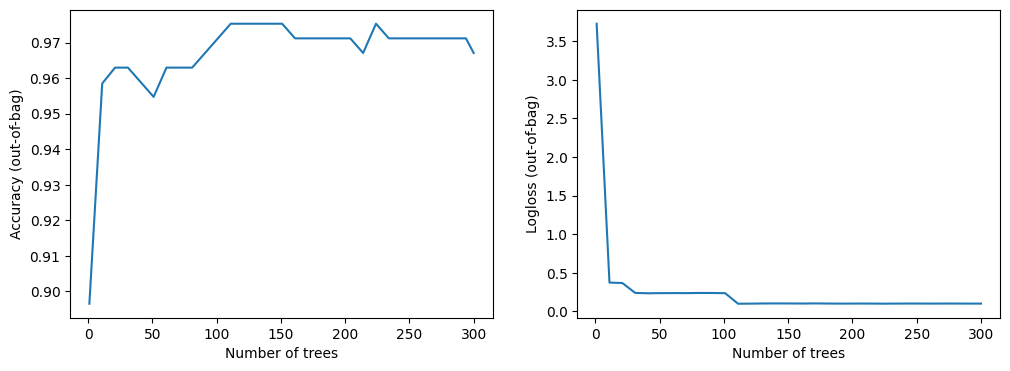

In [25]:
import matplotlib.pyplot as plt

logs = model_1.make_inspector().training_logs()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")

plt.subplot(1, 2, 2)
plt.plot([log.num_trees for log in logs], [log.evaluation.loss for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Logloss (out-of-bag)")

plt.show()

Re-train the model with a different learning algorithm

In [28]:
tfdf.keras.get_all_models()

[tensorflow_decision_forests.keras.RandomForestModel,
 tensorflow_decision_forests.keras.GradientBoostedTreesModel,
 tensorflow_decision_forests.keras.CartModel,
 tensorflow_decision_forests.keras.DistributedGradientBoostedTreesModel]

In [29]:
# help works anywhere.
help(tfdf.keras.RandomForestModel)

# ? only works in ipython or notebooks, it usually opens on a separate panel.
tfdf.keras.RandomForestModel?

Help on class RandomForestModel in module tensorflow_decision_forests.keras:

class RandomForestModel(tensorflow_decision_forests.keras.wrappers.RandomForestModel)
 |  RandomForestModel(*args, **kwargs)
 |  
 |  Method resolution order:
 |      RandomForestModel
 |      tensorflow_decision_forests.keras.wrappers.RandomForestModel
 |      tensorflow_decision_forests.keras.core.CoreModel
 |      tensorflow_decision_forests.keras.core_inference.InferenceCoreModel
 |      keras.engine.training.Model
 |      keras.engine.base_layer.Layer
 |      tensorflow.python.module.module.Module
 |      tensorflow.python.trackable.autotrackable.AutoTrackable
 |      tensorflow.python.trackable.base.Trackable
 |      keras.utils.version_utils.LayerVersionSelector
 |      keras.utils.version_utils.ModelVersionSelector
 |      builtins.object
 |  
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {}
 |  
 |  ----------------------------------------------------------------------
 |  Me

Init signature: tfdf.keras.RandomForestModel(*args, **kwargs)
Docstring:     
Random Forest learning algorithm.

A Random Forest (https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf)
is a collection of deep CART decision trees trained independently and without
pruning. Each tree is trained on a random subset of the original training 
dataset (sampled with replacement).

The algorithm is unique in that it is robust to overfitting, even in extreme
cases e.g. when there are more features than training examples.

It is probably the most well-known of the Decision Forest training
algorithms.

Usage example:

```python
import tensorflow_decision_forests as tfdf
import pandas as pd

dataset = pd.read_csv("project/dataset.csv")
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(dataset, label="my_label")

model = tfdf.keras.RandomForestModel()
model.fit(tf_dataset)

print(model.summary())
```

Hyper-parameter tuning:

```python
import tensorflow_decision_forests as tfdf
import pandas a

Using a subset of features

In [30]:
feature_1 = tfdf.keras.FeatureUsage(name="bill_length_mm")
feature_2 = tfdf.keras.FeatureUsage(name="island")

all_features = [feature_1, feature_2]

# Note: This model is only trained with two features. It will not be as good as
# the one trained on all features.

model_2 = tfdf.keras.GradientBoostedTreesModel(
    features=all_features, exclude_non_specified_features=True)

model_2.compile(metrics=["accuracy"])
model_2.fit(train_ds, validation_data=test_ds)

print(model_2.evaluate(test_ds, return_dict=True))

Use /tmp/tmpkdk7bgrs as temporary training directory


[WARNING 23-05-29 08:44:21.2814 UTC gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-05-29 08:44:21.2835 UTC gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-05-29 08:44:21.2835 UTC gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Reading training dataset...
Training dataset read in 0:00:01.277903. Found 243 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(101, shape=(), dtype=int32)
Validation dataset read in 0:00:00.571756. Found 101 examples.
Training model...
Model trained in 0:00:01.628550
Compiling model...


[INFO 23-05-29 08:44:24.9139 UTC kernel.cc:1242] Loading model from path /tmp/tmpkdk7bgrs/model/ with prefix 6706c09a3ed345f8
[INFO 23-05-29 08:44:24.9859 UTC decision_forest.cc:660] Model loaded with 123 root(s), 3791 node(s), and 2 input feature(s).
[INFO 23-05-29 08:44:24.9859 UTC abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 23-05-29 08:44:24.9867 UTC kernel.cc:1074] Use fast generic engine
2023-05-29 08:44:25.054048: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_2' with dtype double and shape [243]
	 [[{{node Placeholder/_2}}]]


Model compiled.
1/1 [==============================] - 0s 148ms/step - loss: 0.0000e+00 - accuracy: 0.9307
{'loss': 0.0, 'accuracy': 0.9306930899620056}


Menggunakan Semantic

In [31]:
feature_1 = tfdf.keras.FeatureUsage(name="year", semantic=tfdf.keras.FeatureSemantic.CATEGORICAL)
feature_2 = tfdf.keras.FeatureUsage(name="bill_length_mm")
feature_3 = tfdf.keras.FeatureUsage(name="sex")
all_features = [feature_1, feature_2, feature_3]

model_3 = tfdf.keras.GradientBoostedTreesModel(features=all_features, exclude_non_specified_features=True)
model_3.compile( metrics=["accuracy"])

model_3.fit(train_ds, validation_data=test_ds)

Use /tmp/tmpsir7pjud as temporary training directory
Reading training dataset...


[WARNING 23-05-29 09:22:54.4033 UTC gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-05-29 09:22:54.4040 UTC gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-05-29 09:22:54.4040 UTC gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.390555. Found 243 examples.
Reading validation dataset...
Num validation examples: tf.Tensor(101, shape=(), dtype=int32)
Validation dataset read in 0:00:00.287764. Found 101 examples.
Training model...
Model trained in 0:00:01.471172
Compiling model...


[INFO 23-05-29 09:22:56.5899 UTC kernel.cc:1242] Loading model from path /tmp/tmpsir7pjud/model/ with prefix 2fd0bd698729425a
[INFO 23-05-29 09:22:56.6051 UTC decision_forest.cc:660] Model loaded with 138 root(s), 4286 node(s), and 3 input feature(s).
[INFO 23-05-29 09:22:56.6051 UTC abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 23-05-29 09:22:56.6051 UTC kernel.cc:1074] Use fast generic engine
2023-05-29 09:22:56.630660: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype double and shape [243]
	 [[{{node Placeholder/_3}}]]


Model compiled.


Hyper-parameters

In [32]:
# A classical but slighly more complex model.
model_6 = tfdf.keras.GradientBoostedTreesModel(
    num_trees=500, growing_strategy="BEST_FIRST_GLOBAL", max_depth=8)
model_6.fit(train_ds)

Use /tmp/tmp9gzs_mrn as temporary training directory
Reading training dataset...


[WARNING 23-05-29 09:43:42.3927 UTC gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-05-29 09:43:42.3928 UTC gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-05-29 09:43:42.3928 UTC gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.420531. Found 243 examples.
Training model...
Model trained in 0:00:03.178247
Compiling model...


[INFO 23-05-29 09:43:45.9851 UTC kernel.cc:1242] Loading model from path /tmp/tmp9gzs_mrn/model/ with prefix 9fce13fe57234c33
[INFO 23-05-29 09:43:46.0156 UTC decision_forest.cc:660] Model loaded with 195 root(s), 9795 node(s), and 7 input feature(s).
[INFO 23-05-29 09:43:46.0157 UTC abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 23-05-29 09:43:46.0157 UTC kernel.cc:1074] Use fast generic engine
2023-05-29 09:43:46.042819: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype string and shape [243]
	 [[{{node Placeholder/_4}}]]


Model compiled.


In [33]:
# A more complex, but possibly, more accurate model.
model_7 = tfdf.keras.GradientBoostedTreesModel(
    num_trees=500,
    growing_strategy="BEST_FIRST_GLOBAL",
    max_depth=8,
    split_axis="SPARSE_OBLIQUE",
    categorical_algorithm="RANDOM",
    )
model_7.fit(train_ds)

Use /tmp/tmpdcqscy25 as temporary training directory
Reading training dataset...


[WARNING 23-05-29 09:44:15.4326 UTC gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-05-29 09:44:15.4326 UTC gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-05-29 09:44:15.4326 UTC gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.362806. Found 243 examples.
Training model...


[INFO 23-05-29 09:44:36.1658 UTC kernel.cc:1242] Loading model from path /tmp/tmpdcqscy25/model/ with prefix 90388ac2535840a3


Model trained in 0:00:20.742150
Compiling model...


[INFO 23-05-29 09:44:36.5378 UTC decision_forest.cc:660] Model loaded with 1500 root(s), 87264 node(s), and 7 input feature(s).
[INFO 23-05-29 09:44:36.5378 UTC abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 23-05-29 09:44:36.5379 UTC kernel.cc:1074] Use fast generic engine
2023-05-29 09:44:36.608334: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype string and shape [243]
	 [[{{node Placeholder/_5}}]]


Model compiled.


In [34]:
# A good template of hyper-parameters.
model_8 = tfdf.keras.GradientBoostedTreesModel(hyperparameter_template="benchmark_rank1")
model_8.fit(train_ds)

Resolve hyper-parameter template "benchmark_rank1" to "benchmark_rank1@v1" -> {'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}.
Use /tmp/tmp1yinyhxe as temporary training directory
Reading training dataset...


[WARNING 23-05-29 09:55:26.4353 UTC gradient_boosted_trees.cc:1797] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-05-29 09:55:26.4354 UTC gradient_boosted_trees.cc:1808] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-05-29 09:55:26.4354 UTC gradient_boosted_trees.cc:1822] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


Training dataset read in 0:00:00.390846. Found 243 examples.
Training model...
Model trained in 0:00:08.832418
Compiling model...


[INFO 23-05-29 09:55:35.6024 UTC kernel.cc:1242] Loading model from path /tmp/tmp1yinyhxe/model/ with prefix dc1333b3d26c4c92
[INFO 23-05-29 09:55:35.6696 UTC decision_forest.cc:660] Model loaded with 900 root(s), 36016 node(s), and 7 input feature(s).
[INFO 23-05-29 09:55:35.6697 UTC abstract_model.cc:1311] Engine "GradientBoostedTreesGeneric" built
[INFO 23-05-29 09:55:35.6697 UTC kernel.cc:1074] Use fast generic engine
2023-05-29 09:55:35.709113: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_5' with dtype string and shape [243]
	 [[{{node Placeholder/_5}}]]


Model compiled.


In [35]:
# The hyper-parameter templates of the Gradient Boosted Tree model.
print(tfdf.keras.GradientBoostedTreesModel.predefined_hyperparameters())

[HyperParameterTemplate(name='better_default', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL'}, description='A configuration that is generally better than the default parameters without being more expensive.'), HyperParameterTemplate(name='benchmark_rank1', version=1, parameters={'growing_strategy': 'BEST_FIRST_GLOBAL', 'categorical_algorithm': 'RANDOM', 'split_axis': 'SPARSE_OBLIQUE', 'sparse_oblique_normalization': 'MIN_MAX', 'sparse_oblique_num_projections_exponent': 1.0}, description='Top ranking hyper-parameters on our benchmark slightly modified to run in reasonable time.')]


Feature Preprocessing

In [36]:
body_mass_g = tf.keras.layers.Input(shape=(1,), name="body_mass_g")
body_mass_kg = body_mass_g / 1000.0

bill_length_mm = tf.keras.layers.Input(shape=(1,), name="bill_length_mm")

raw_inputs = {"body_mass_g": body_mass_g, "bill_length_mm": bill_length_mm}
processed_inputs = {"body_mass_kg": body_mass_kg, "bill_length_mm": bill_length_mm}

# "preprocessor" contains the preprocessing logic.
preprocessor = tf.keras.Model(inputs=raw_inputs, outputs=processed_inputs)

# "model_4" contains both the pre-processing logic and the decision forest.
model_4 = tfdf.keras.RandomForestModel(preprocessing=preprocessor)
model_4.fit(train_ds)

model_4.summary()

Use /tmp/tmp0zk9vl0z as temporary training directory
Reading training dataset...


/opt/conda/lib/python3.10/site-packages/keras/engine/functional.py:639: UserWarning: Input dict contained keys ['island', 'bill_depth_mm', 'flipper_length_mm', 'sex', 'year'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


Training dataset read in 0:00:01.020377. Found 243 examples.
Training model...
Model trained in 0:00:00.093824
Compiling model...
Model compiled.


[INFO 23-05-29 10:11:28.2694 UTC kernel.cc:1242] Loading model from path /tmp/tmp0zk9vl0z/model/ with prefix a7f283564cbd4fa9
[INFO 23-05-29 10:11:28.2902 UTC decision_forest.cc:660] Model loaded with 300 root(s), 6028 node(s), and 2 input feature(s).
[INFO 23-05-29 10:11:28.2903 UTC abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-05-29 10:11:28.2903 UTC kernel.cc:1074] Use fast generic engine
2023-05-29 10:11:28.308026: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_3' with dtype double and shape [243]
	 [[{{node Placeholder/_3}}]]


Model: "random_forest_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 model (Functional)          {'body_mass_kg': (None,   0         
                             1),                                 
                              'bill_length_mm': (None            
                             , 1)}                               
                                                                 
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (2):
	bill_length_mm
	body_mass_kg

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1. "bill_length_mm"  0.963865 ################
    2.   "body_mass_kg"  0.444423 

Variable Importance: NUM_AS_ROOT:
    1. "bill_length_mm" 291.000000 ################
    2.   "body_mass_kg"  9.000000 

Variabl

In [37]:
def g_to_kg(x):
  return x / 1000

feature_columns = [
    tf.feature_column.numeric_column("body_mass_g", normalizer_fn=g_to_kg),
    tf.feature_column.numeric_column("bill_length_mm"),
]

preprocessing = tf.keras.layers.DenseFeatures(feature_columns)

model_5 = tfdf.keras.RandomForestModel(preprocessing=preprocessing)
model_5.fit(train_ds)

Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.


Use /tmp/tmp10u1nwi8 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.398174. Found 243 examples.
Training model...


2023-05-29 10:19:56.909634: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'data_1' with dtype double and shape [?]
	 [[{{node data_1}}]]
2023-05-29 10:19:56.909883: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'data_4' with dtype double and shape [?]
	 [[{{node data_4}}]]


Model trained in 0:00:00.127055
Compiling model...


[INFO 23-05-29 10:19:57.2047 UTC kernel.cc:1242] Loading model from path /tmp/tmp10u1nwi8/model/ with prefix 2f8ab4920029497d
[INFO 23-05-29 10:19:57.2206 UTC decision_forest.cc:660] Model loaded with 300 root(s), 6028 node(s), and 2 input feature(s).
[INFO 23-05-29 10:19:57.2206 UTC abstract_model.cc:1311] Engine "RandomForestGeneric" built
[INFO 23-05-29 10:19:57.2206 UTC kernel.cc:1074] Use fast generic engine
2023-05-29 10:19:57.238898: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_6' with dtype int64 and shape [243]
	 [[{{node Placeholder/_6}}]]
2023-05-29 10:19:57.325986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value fo

Model compiled.
